In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,120599.000000,1.205990e+05,120599.000000,120599.000000,120599.000000,120599.000000,1.205990e+05,1.205970e+05,120597.000000,120597.000000,120597.000000
mean,30180.990663,4.190697e+17,70.438448,48690.013184,38.535386,-90.164192,8.993559e+04,1.349071e+09,38.533941,-90.164956,0.006750
std,17461.899724,1.311573e+18,149.774996,26886.793922,5.081971,13.756112,3.033318e+05,2.285008e+07,5.115632,13.769314,0.081879
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.670132,0.000000
25%,15074.500000,1.800429e+14,9.700000,26041.000000,34.620500,-96.786900,7.430000e+02,1.326924e+09,34.745869,-96.849430,0.000000
50%,30149.000000,3.519233e+15,47.510000,48088.000000,39.371600,-87.456900,2.456000e+03,1.328418e+09,39.366148,-87.381333,0.000000
75%,45224.000000,4.634956e+15,83.190000,72011.000000,41.940400,-80.128400,2.047800e+04,1.372603e+09,41.945744,-80.181599,0.000000
max,62255.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.373574e+09,66.669356,-66.955602,1.000000


In [ ]:
print(train.shape)
print(test.shape)

(62256, 23)
(58343, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

In [ ]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837

In [ ]:
train.info


<bound method DataFrame.info of        Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2019-01-01 00:00:18  2703186189652095   
1               1   2019-01-01 00:00:44      630423337322   
2               2   2019-01-01 00:00:51    38859492057661   
3               3   2019-01-01 00:01:16  3534093764340240   
4               4   2019-01-01 00:03:06   375534208663984   
...           ...                   ...               ...   
31146       31146   2019-01-19 16:32:18   373905417449658   
31147       31147   2019-01-19 16:33:30  4979422371139333   
31148       31148   2019-01-19 16:33:50   349612764943496   
31149       31149   2019-01-19 16:34:54   213156747557083   
31150       31150   2019-01-19 16:35:31      503848303379   

                                 merchant        category     amt      first  \
0              fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1         fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                    fraud_Lind-Buckridge   entertainment  220.11     Edward   
3      fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                     fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                   ...             ...     ...        ...   
31146      fraud_Lesch, D'Amore and Brown     food_dining  166.48      Sarah   
31147        fraud_Torp, Muller and Borer  health_fitness    1.15      Kelly   
31148                    fraud_Jacobi Inc  health_fitness   72.92     Xavier   
31149                   fraud_Reichel LLC   personal_care    3.04       Adam   
31150                   fraud_Marvin-Lind   personal_care   72.26    Gregory   

            last gender                        street  ...      lat      long  \
0          Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1           Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2        Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3          White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4         Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...          ...    ...                           ...  ...      ...       ...   
31146     Bishop      F  554 Mcdonald Valley Apt. 539  ...  31.9290  -97.6443   
31147  Zimmerman      F             1893 Katie Tunnel  ...  41.4193  -99.3844   
31148    Beltran      M    61107 Edwards Dam Apt. 463  ...  37.1046  -83.5706   
31149     Santos      M         725 Jo Trace Apt. 102  ...  34.1556 -118.2322   
31150    Wallace      M         27203 Darrell Landing  ...      NaN       NaN   

       city_pop                                job         dob  \
0        3495.0          Psychologist, counselling  1988-03-09   
1         149.0  Special educational needs teacher  1978-06-21   
2        4154.0        Nature conservation officer  1962-01-19   
3        1939.0                    Patent attorney  1967-01-12   
4          99.0     Dance movement psychotherapist  1986-03-28   
...         ...                                ...         ...   
31146    2526.0                     Phytotherapist  1970-11-12   
31147      73.0                   Product designer  1935-02-10   
31148     467.0             Psychologist, forensic  1984-06-04   
31149  172817.0        Advertising account planner  1982-07-30   
31150       NaN                                NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1      1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2      a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3      6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4      a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   
...                         

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [ ]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)
print(data.shape)

(31151, 23)
(555719, 23)
(586870, 23)


In [ ]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     26   
1           1      630423337322       241         4  107.23       0     46   
2           2    38859492057661       390         0  220.11       1     12   
3           3  3534093764340240       360         2   45.00       1     25   
4           4   375534208663984       297         9   41.96       1     44   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

In [ ]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

31151
0


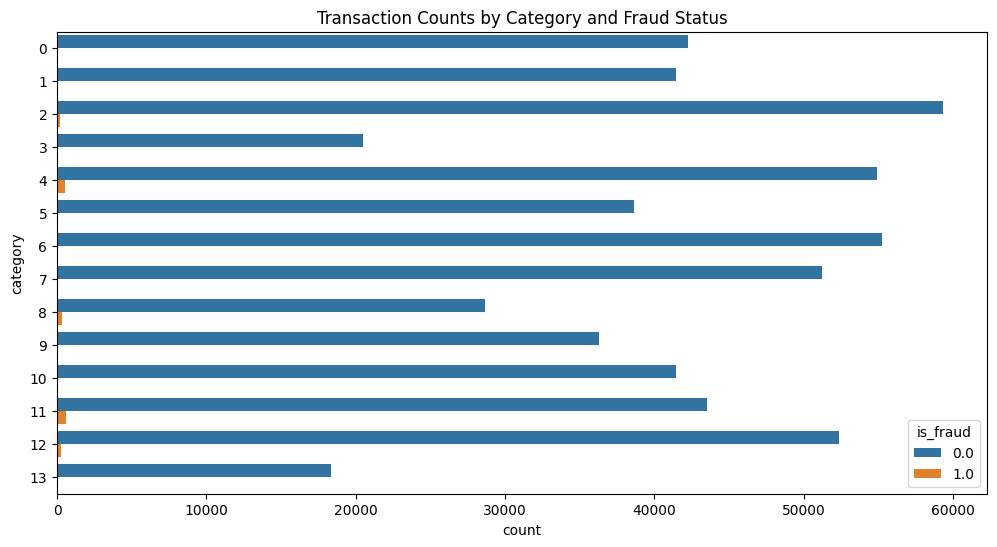

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

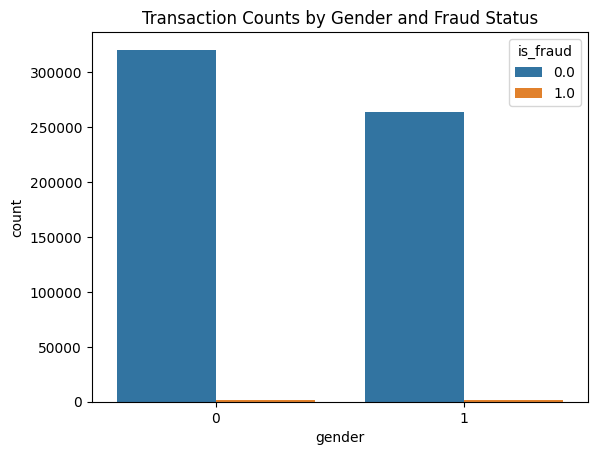

In [ ]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

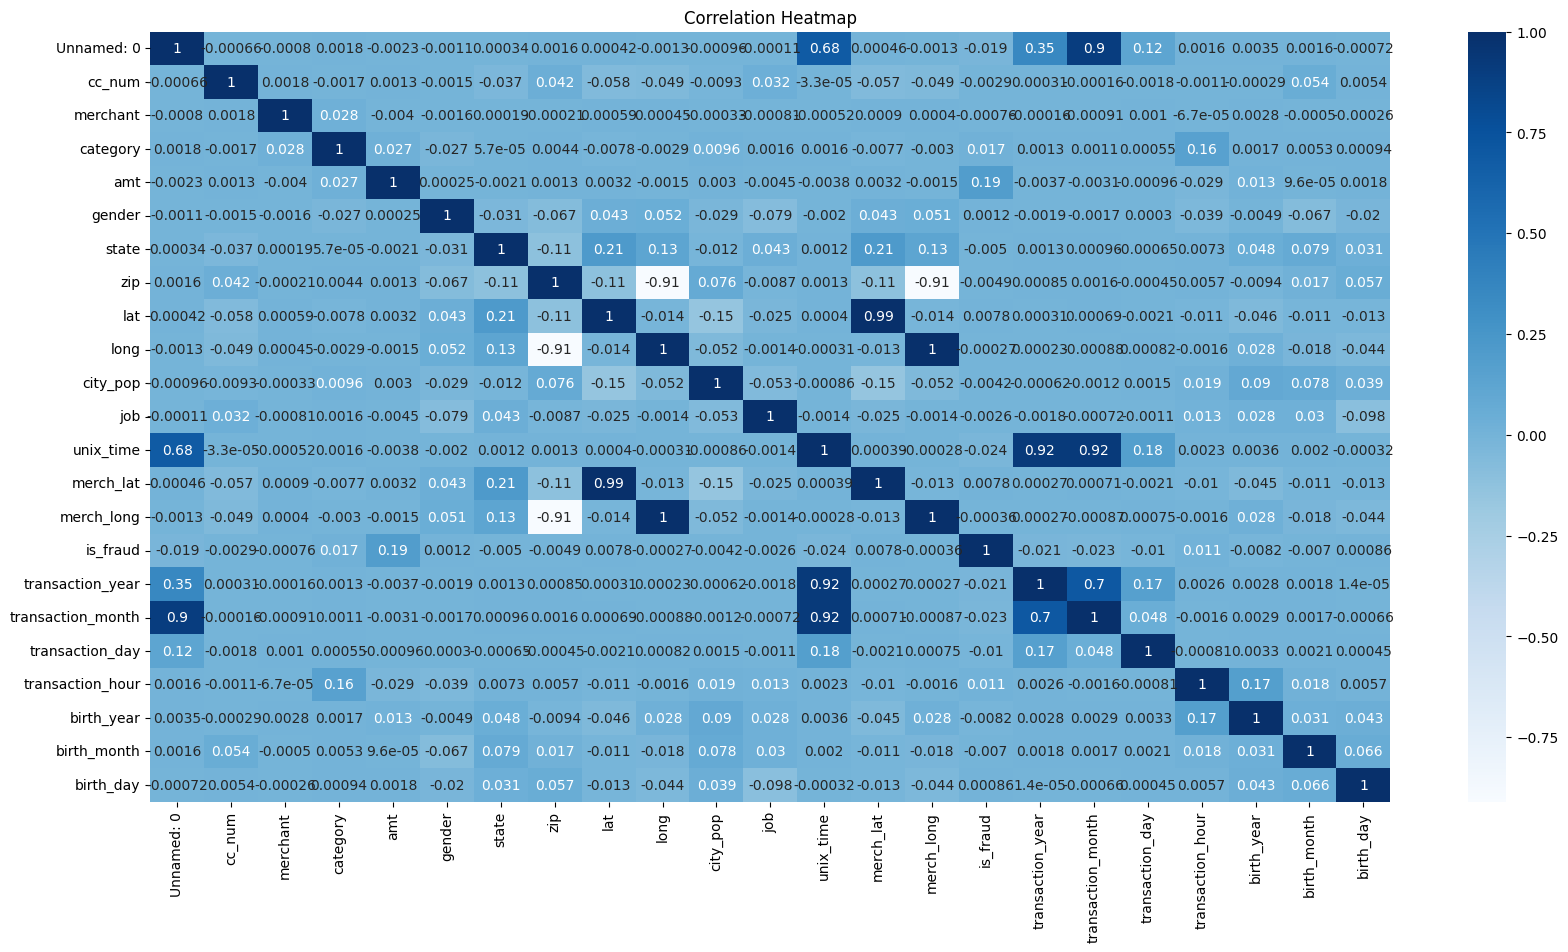

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)